# Analysis on Criminal Activities in the City of Montreal

### Importing Libraries and Loading Datasets

In [31]:
# importing the nexessary libraries

import pandas as pd

# importing geopandas to read geojson file
import geopandas as gpd
import matplotlib.pyplot as plt

import folium
from folium.plugins import MarkerCluster

In [3]:
# Loading the datasets
crime_data = pd.read_csv("actes-criminels.csv")
pdq_geojson = gpd.read_file("limitespdq.geojson")

In [4]:
# structure of datasets
print(crime_data.info())
print(pdq_geojson.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244117 entries, 0 to 244116
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CATEGORIE  244117 non-null  object 
 1   DATE       244117 non-null  object 
 2   QUART      244117 non-null  object 
 3   PDQ        244112 non-null  float64
 4   X          202724 non-null  float64
 5   Y          202724 non-null  float64
 6   LONGITUDE  202724 non-null  float64
 7   LATITUDE   202724 non-null  float64
dtypes: float64(5), object(3)
memory usage: 14.9+ MB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PDQ       29 non-null     int64   
 1   NOM_PDQ   29 non-null     object  
 2   geometry  29 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 828.0+ bytes
None


In [7]:
# Previewing the data
print(crime_data.head())
print(pdq_geojson.head())

                  CATEGORIE        DATE QUART   PDQ              X  \
0  Vol de véhicule à moteur  2018-09-13  jour  30.0  294904.159001   
1  Vol de véhicule à moteur  2018-04-30  jour  30.0  294904.159001   
2  Vol de véhicule à moteur  2018-09-01  nuit   7.0  290274.565000   
3                    Méfait  2017-07-21  jour  21.0            NaN   
4                    Méfait  2017-07-29  jour  12.0            NaN   

              Y  LONGITUDE   LATITUDE  
0  5.047549e+06 -73.626778  45.567780  
1  5.047549e+06 -73.626778  45.567780  
2  5.042150e+06 -73.685928  45.519122  
3           NaN        NaN        NaN  
4           NaN        NaN        NaN  
   PDQ NOM_PDQ                                           geometry
0    1   PDQ-1  MULTIPOLYGON (((-73.84050 45.45690, -73.84220 ...
1    3   PDQ-3  MULTIPOLYGON (((-73.93970 45.47010, -73.93980 ...
2    4   PDQ-4  MULTIPOLYGON (((-73.81590 45.50260, -73.81580 ...
3    5   PDQ-5  MULTIPOLYGON (((-73.72280 45.43200, -73.72270 ...
4    7   

## Analysis

### Top 3 prevalent crimes (categories) committed in Montreal

In [6]:
top_crimes = crime_data['CATEGORIE'].value_counts().head(3)
print("Top 3 prevalent crimes: ")
print(top_crimes)

Top 3 prevalent crimes: 
CATEGORIE
Vol dans / sur véhicule à moteur    72291
Introduction                        61107
Méfait                              53720
Name: count, dtype: int64


As per the analysis, the top 3 criminal activities are **Theft of Motor Vehicle** *(72,291 cases)*, **Breaking and Entering** *(61,107 cases)* and **Mischief** *(53,720 cases)*.

*P.S.: The names of the criminal activities have been translated into English as per the context of City of Montreal*

### What part of the day did most of the crimes occur?

In [9]:
crime_time_distribution = crime_data['QUART'].value_counts()
print('Crime incidents by part of the day: ')
print(crime_time_distribution)

Crime incidents by part of the day: 
QUART
jour    124382
soir     81612
nuit     38123
Name: count, dtype: int64


This shows that the majority of the crimes took place during the **day time (8:01am to 4:00pm)** *(124,382 cases)*, followed by **evening time (4:01pm to midnight)** *(81,612 cases)* and then **nighttime (0:01am to 8:00am)** *(38,123 cases)*

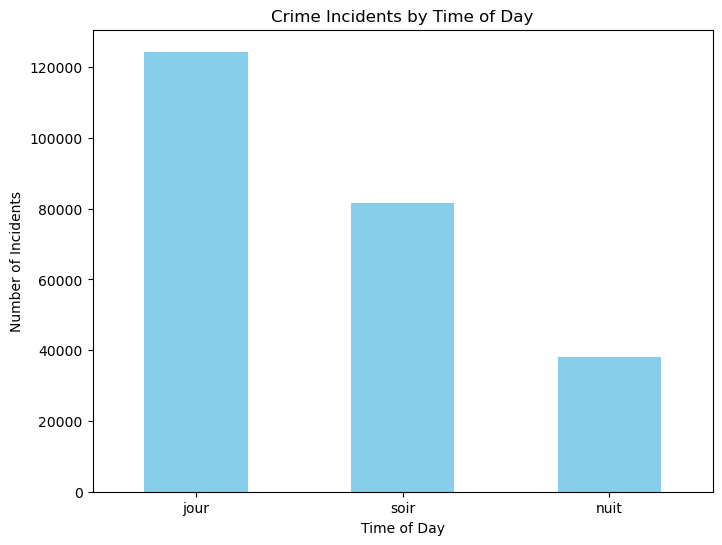

In [10]:
# Plot crime incidents by part of the day
plt.figure(figsize=(8, 6))
crime_time_distribution.plot(kind='bar', color='skyblue')
plt.title('Crime Incidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

### Top 5 Police precincts (PDQ) with most police complaints

In [11]:
top_pdq_complaints = crime_data['PDQ'].value_counts().head(5)
print("Top 5 police precincts with the most crime complaints: ")
print(top_pdq_complaints)

Top 5 police precincts with the most crime complaints: 
PDQ
38.0    17265
21.0    14326
20.0    13593
48.0    11795
39.0    11149
Name: count, dtype: int64


Here, we can see the top 5 precincts represented by their numbers (IDs).

### 3 PDQs with the least crime complaints

In [13]:
bottom_pdq_complaints = crime_data['PDQ'].value_counts().tail(3)
print("3 police precincts with the most crime complaints: ")
print(bottom_pdq_complaints)

3 police precincts with the most crime complaints: 
PDQ
24.0    2532
50.0    1950
55.0      90
Name: count, dtype: int64


### Merging the csv and the GeoJson file

In [15]:
crime_pdq_merged = pd.merge(crime_data, pdq_geojson, on='PDQ')

### Neighborhoods with highest crime incidents and the respective crime type

In [22]:
neighborhood_crime = crime_pdq_merged.groupby('NOM_PDQ')['CATEGORIE'].value_counts().groupby(level=0).nlargest(1)
print("Neighborhoods with the highest crime incidents and crime types:")
print(neighborhood_crime)

Neighborhoods with the highest crime incidents and crime types:
NOM_PDQ  NOM_PDQ  CATEGORIE                       
PDQ-1    PDQ-1    Introduction                         845
PDQ-10   PDQ-10   Vol dans / sur véhicule à moteur    1488
PDQ-12   PDQ-12   Vol dans / sur véhicule à moteur    1561
PDQ-13   PDQ-13   Méfait                              1655
PDQ-15   PDQ-15   Introduction                        2774
PDQ-16   PDQ-16   Introduction                        1799
PDQ-20   PDQ-20   Vol dans / sur véhicule à moteur    7602
PDQ-21   PDQ-21   Vol dans / sur véhicule à moteur    6840
PDQ-22   PDQ-22   Introduction                        2413
PDQ-23   PDQ-23   Introduction                        3209
PDQ-26   PDQ-26   Introduction                        2910
PDQ-27   PDQ-27   Vol dans / sur véhicule à moteur    2424
PDQ-3    PDQ-3    Introduction                        1361
PDQ-30   PDQ-30   Vol dans / sur véhicule à moteur    2125
PDQ-31   PDQ-31   Vol dans / sur véhicule à moteur    2119


This sorts the PDQs from highest to lowest in terms of the number of criminal activities and shows the most common category of crime and its respective occurences.

### Neighborhood with the most murder cases

In [27]:
murder_neighborhood = crime_pdq_merged[crime_pdq_merged['CATEGORIE'] == 'Infractions entrainant la mort']['NOM_PDQ'].value_counts().idxmax()
print("Neighborhood with most number of murders: ", murder_neighborhood)

Neighborhood with most number of murders:  PDQ-39


In [35]:
# Dropping rows with missing latitude or longitude values
crime_data_clean = crime_pdq_merged.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Creating a folium map centered around Montreal
m = folium.Map(location=[45.5017, -73.5673], zoom_start=11)

# Creating a MarkerCluster layer to group crime markers
marker_cluster = MarkerCluster().add_to(m)

# Adding crime incidents as markers to the map
for index, row in crime_data_clean.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=row['CATEGORIE']).add_to(marker_cluster)

# Save the map to an HTML file
m.save("crime_map.html")